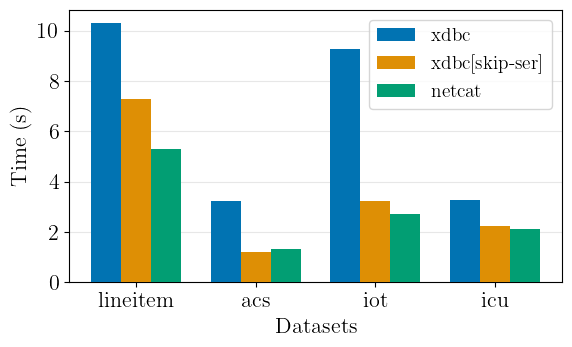

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
csv_file_path = 'figure11.csv'  # Replace with your actual file path
data = pd.read_csv(csv_file_path)

# Replace mismatched table names
data['table'] = data['table'].replace({
    'lineitem_sf10': 'lineitem',
    'ss13husallm': 'acs',
    'iotm': 'iot',
    'inputeventsm': 'icu'
})

# Replace system names for clarity
data['system'] = data['system'].replace({
    'xdbc-skip0': 'xdbc',
    'xdbc-skip1': 'xdbc[skip-ser]',
    'read_csv_url': 'netcat'
})

# Calculate the average time for each combination of table and system
average_times = (
    data.groupby(['table', 'system'])['time']
    .min()
    .reset_index()
    .pivot(index='table', columns='system', values='time')
)

# Define the order of systems and datasets for consistency
systems = ['xdbc', 'xdbc[skip-ser]', 'netcat']
tables = ['lineitem', 'acs', 'iot', 'icu']

# Reindex to ensure proper order and fill missing values with 0 (if any)
average_times = average_times.reindex(index=tables, columns=systems, fill_value=0)

# Extract data for plotting
approach_times = [average_times[system].values for system in systems]

# Set up plot style
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Create the plot
datasets = tables  # Adjust dataset names for readability
formal_palette = sns.color_palette("colorblind", len(systems))
bar_width = 0.25
x_indexes = np.arange(len(datasets))

plt.figure(figsize=(6, 3.75))

# Plotting each approach with offset for bar positions
for i, (system, times) in enumerate(zip(systems, approach_times)):
    plt.bar(x_indexes + (i - 1) * bar_width, times, width=bar_width, color=formal_palette[i], label=system, zorder=3)

# Labels and Title
plt.xlabel('Datasets')
plt.ylabel('Time (s)')
plt.xticks(ticks=x_indexes, labels=datasets)
plt.legend(loc='best')

# Grid for better readability
plt.grid(axis='y', alpha=0.3, zorder=0)

# Display the plot
plt.tight_layout()
plt.savefig('csv_netcat_env_local.pdf', bbox_inches='tight')
plt.show()


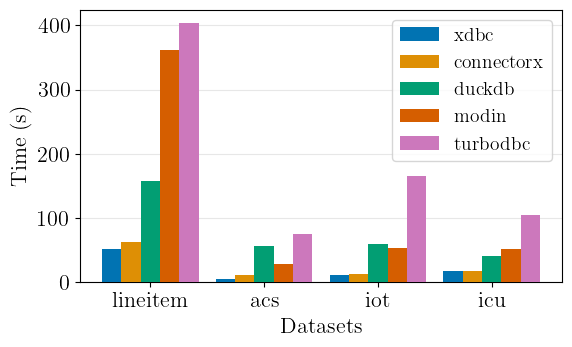

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv("figure8a.csv")

# Replace mismatched table names
data['table'] = data['table'].replace({
    'lineitem_sf10': 'lineitem',
    'ss13husallm': 'acs',
    'iotm': 'iot',
    'inputeventsm': 'icu'
})

# Calculate the average time for each combination of table and system
average_times = (
    data.groupby(['table', 'system'])['time']
    .mean()
    .reset_index()
    .pivot(index='table', columns='system', values='time')
)

# Define the order of systems and datasets for consistency
systems = ['xdbc', 'connectorx', 'duckdb', 'modin', 'turbodbc']
tables = ['lineitem', 'acs', 'iot', 'icu']

# Reindex to ensure proper order and fill missing values with 0 (if any)
average_times = average_times.reindex(index=tables, columns=systems, fill_value=0)

# Extract data for plotting
approach_times = [average_times[system].values for system in systems]

# Set up plot style
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Create the plot
datasets = ['lineitem', 'acs', 'iot', 'icu']  # Adjust dataset names for readability
formal_palette = sns.color_palette("colorblind", len(systems))
bar_width = 0.17
x_indexes = np.arange(len(datasets))

plt.figure(figsize=(6, 3.75))

# Plotting each approach with offset for bar positions
for i, (system, times) in enumerate(zip(systems, approach_times)):
    plt.bar(x_indexes + (i - 2) * bar_width, times, width=bar_width, color=formal_palette[i], label=system, zorder=3)

# Labels and Title
plt.xlabel('Datasets')
plt.ylabel('Time (s)')
plt.xticks(ticks=x_indexes, labels=datasets)
plt.legend(loc='best')

# Grid for better readability
plt.grid(axis='y', alpha=0.3, zorder=0)

# Display the plot
plt.tight_layout()
plt.savefig('pandas_postgres.pdf', bbox_inches='tight')
plt.show()

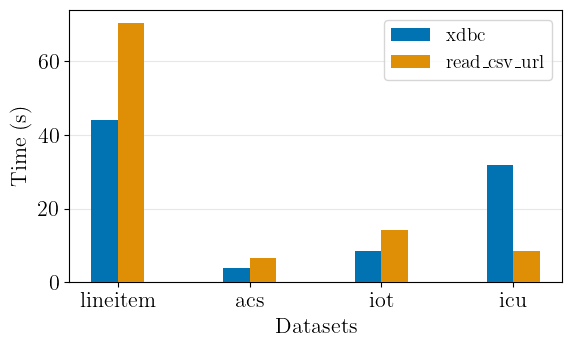

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv("figure8b.csv")

# Replace mismatched table names
data['table'] = data['table'].replace({
    'lineitem_sf10': 'lineitem',
    'ss13husallm': 'acs',
    'iotm': 'iot',
    'inputeventsm': 'icu'
})

# Calculate the average time for each combination of table and system
average_times = (
    data.groupby(['table', 'system'])['time']
    .mean()
    .reset_index()
    .pivot(index='table', columns='system', values='time')
)

# Define the order of systems and datasets for consistency
systems = ['xdbc', 'read_csv_url']
tables = ['lineitem', 'acs', 'iot', 'icu']

# Reindex to ensure proper order and fill missing values with 0 (if any)
average_times = average_times.reindex(index=tables, columns=systems, fill_value=0)

# Extract data for plotting
approach_times = [average_times[system].values for system in systems]

# Set up plot style
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Create the plot
datasets = ['lineitem', 'acs', 'iot', 'icu']  # Adjust dataset names for readability
formal_palette = sns.color_palette("colorblind", len(systems))
bar_width = 0.2
x_indexes = np.arange(len(datasets))

plt.figure(figsize=(6, 3.75))

# Plotting each approach with offset for bar positions
for i, (system, times) in enumerate(zip(systems, approach_times)):
    plt.bar(x_indexes + (i - 0.5) * bar_width, times, width=bar_width, color=formal_palette[i], label=system, zorder=3)

# Labels and Title
plt.xlabel('Datasets')
plt.ylabel('Time (s)')
plt.xticks(ticks=x_indexes, labels=datasets)
plt.legend(loc='best')

# Grid for better readability
plt.grid(axis='y', alpha=0.3, zorder=0)

# Display the plot
plt.tight_layout()
plt.savefig('pandas_csv', bbox_inches='tight')
plt.show()


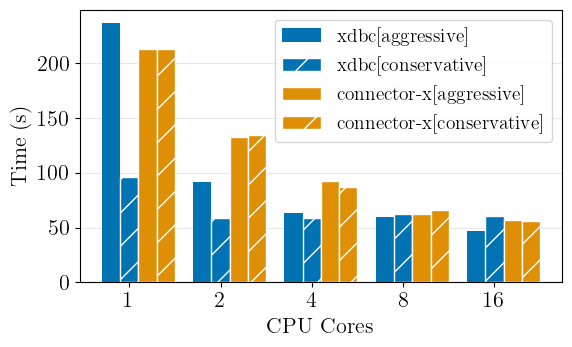

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv("figurePandasPGCPU.csv")

# Filter for network == 0 and include conf1, conf2, and connector-x
systems = ['xdbc[aggressive]', 'xdbc[conservative]', 'connector-x[aggressive]','connector-x[conservative]']
data = data[(data['network'] == 0) & (data['system'].isin(systems))]

# Calculate the average time for each combination of CPU cores and system
average_times = (
    data.groupby(['client_cpu', 'system'])['time']
    .mean()
    .reset_index()
    .pivot(index='client_cpu', columns='system', values='time')
)

# Define the order of systems and CPU cores for consistency

cpu_cores = [1,2, 4, 8, 16]

# Reindex to ensure proper order and fill missing values with 0 (if any)
average_times = average_times.reindex(index=cpu_cores, columns=systems, fill_value=0)

# Extract data for plotting
approach_times = [average_times[system].values for system in systems]

# Set up plot style
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Create the plot
datasets = ['1', '2', '4', '8', '16']  # Adjust dataset names for readability
formal_palette = sns.color_palette("colorblind", 2)
bar_width = 0.2
x_indexes = np.arange(len(datasets))

plt.figure(figsize=(6, 3.75))

# Plotting each approach with specified colors and hatches
plt.bar(x_indexes - bar_width, approach_times[0], width=bar_width, color=formal_palette[0], label=systems[0], zorder=3)
plt.bar(x_indexes, approach_times[1], width=bar_width, color=formal_palette[0], label=systems[1], hatch='/', edgecolor='white', zorder=3)
plt.bar(x_indexes + bar_width, approach_times[2], width=bar_width, color=formal_palette[1], label=systems[2], edgecolor='white', zorder=3)
plt.bar(x_indexes + bar_width*2, approach_times[3], width=bar_width, color=formal_palette[1], label=systems[3], hatch='/', edgecolor='white', zorder=3)

# Labels and Title
plt.xlabel('CPU Cores')
plt.ylabel('Time (s)')
plt.xticks(ticks=x_indexes, labels=datasets)
plt.legend(loc='upper right')

# Grid for better readability
plt.grid(axis='y', alpha=0.3, zorder=0)

# Display the plot
plt.tight_layout()
plt.savefig('pandas_cpu.pdf', bbox_inches='tight')
plt.show()


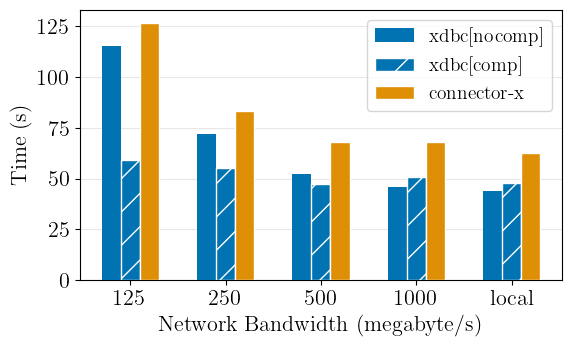

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv("figurePandasPGCPU.csv")

systems = ['xdbc[nocomp]', 'xdbc[comp]', 'connectorx']
# Filter for client_cpu == 32 and include conf1, conf2, and connector-x
data = data[(data['client_cpu'] == 8) & (data['system'].isin(systems))]

# Calculate the average time for each combination of network bandwidth and system
average_times = (
    data.groupby(['network', 'system'])['time']
    .min()
    .reset_index()
    .pivot(index='network', columns='system', values='time')
)

# Define the order of systems and network bandwidth for consistency

networks = sorted(data['network'].unique(), key=lambda x: float('inf') if x == 0 else x)  # Move 0 (unlimited) to the end

# Reindex to ensure proper order and fill missing values with 0 (if any)
average_times = average_times.reindex(index=networks, columns=systems, fill_value=0)

# Extract data for plotting
approach_times = [average_times[system].values for system in systems]

# Set up plot style
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Create the plot
datasets = [str(n) for n in networks]  # Convert network bandwidth to string for readability
datasets = ["local" if n == 0 else str(n) for n in networks]
formal_palette = sns.color_palette("colorblind", 2)
bar_width = 0.2
x_indexes = np.arange(len(datasets))

plt.figure(figsize=(6, 3.75))

# Plotting each approach with specified colors and hatches
plt.bar(x_indexes - bar_width, approach_times[0], width=bar_width, color=formal_palette[0], label='xdbc[nocomp]', zorder=3)
plt.bar(x_indexes, approach_times[1], width=bar_width, color=formal_palette[0], label='xdbc[comp]', hatch='/', edgecolor='white', zorder=3)
plt.bar(x_indexes + bar_width, approach_times[2], width=bar_width, color=formal_palette[1], label='connector-x', edgecolor='white', zorder=3)

# Labels and Title
plt.xlabel('Network Bandwidth (megabyte/s)')
plt.ylabel('Time (s)')
plt.xticks(ticks=x_indexes, labels=datasets)
plt.legend(loc='best')

# Grid for better readability
plt.grid(axis='y', alpha=0.3, zorder=0)

# Display the plot
plt.tight_layout()
plt.savefig('pandas_network.pdf', bbox_inches='tight')
plt.show()


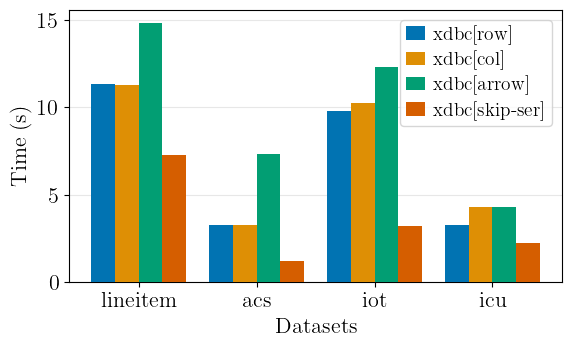

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("figureXArrow.csv")

# Replace mismatched table names
data['table'] = data['table'].replace({
    'lineitem_sf10': 'lineitem',
    'ss13husallm': 'acs',
    'iotm': 'iot',
    'inputeventsm': 'icu'
})

# Extract format and skip information from the 'system' column
data['format'] = data['system'].apply(lambda x: x.split('-')[-1])  # Extract format (e.g., format1, format2, etc.)
data['skip'] = data['system'].apply(lambda x: 'skip1' in x)       # Identify skip-ser (skip1)

# Calculate the average time for each table and format
average_times = (
    data.groupby(['table', 'format'])['time']
    .mean()
    .reset_index()
    .pivot(index='table', columns='format', values='time')
)

# Ensure correct order of formats
formats = ['format1', 'format2', 'format3', 'formatNone']
tables = ['lineitem', 'acs', 'iot', 'icu']  # Desired order for tables
average_times = average_times.reindex(index=tables, columns=formats, fill_value=0)

# Set up plot style
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Plot settings
bar_width = 0.2
x_indexes = np.arange(len(tables))
colors = sns.color_palette("colorblind", len(formats))
labels = ['xdbc[row]', 'xdbc[col]', 'xdbc[arrow]', 'xdbc[skip-ser]']

plt.figure(figsize=(6, 3.75))

# Plot each format
for i, format_ in enumerate(formats):
    plt.bar(x_indexes + (i - 1.5) * bar_width, average_times[format_], width=bar_width,
            label=labels[i], color=colors[i], zorder=3)

# Labels, legend, and formatting
plt.xlabel('Datasets')
plt.ylabel('Time (s)')
plt.xticks(ticks=x_indexes, labels=tables)
plt.legend(loc='best', labelspacing=0.3, borderpad=0.3, handletextpad=0.4, handlelength=1)
plt.grid(axis='y', alpha=0.3, zorder=0)

# Layout adjustments
plt.tight_layout()

# Save and show the plot
plt.savefig("xdbc_csv_formats.pdf", bbox_inches='tight')
plt.show()


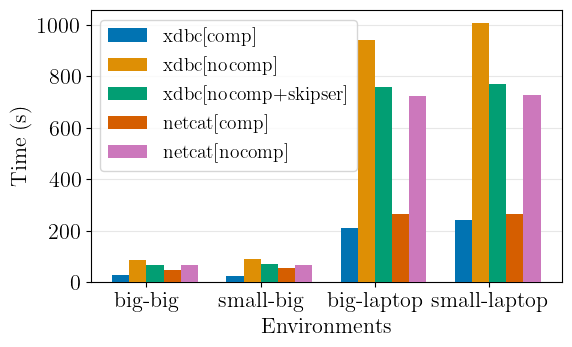

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the environments and approaches
environments = ['big-big', 'small-big', 'big-laptop', 'small-laptop']
approaches = ['xdbc[comp]', 'xdbc[nocomp]', 'xdbc[nocomp+skipser]', 'netcat[comp]', 'netcat[nocomp]']

# Define the hardcoded times for each approach and environment
times = np.array([
    [29, 24, 212, 242],  # xdbc[comp]
    [88, 89, 943, 1008],  # xdbc[nocomp]
    [69, 71, 760, 770],  # xdbc[nocomp+skipser]
    [12+21+16, 19+22+16, 19+235+13, 19+234+13],   # netcat[comp]
    [66, 66, 725, 730]     # netcat[nocomp]
])

# Set up plot style
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Set the bar width and positions
bar_width = 0.15
x_indexes = np.arange(len(environments))
colors = sns.color_palette("colorblind", len(approaches))

# Create the plot
plt.figure(figsize=(6, 3.75))

for i, (approach, color) in enumerate(zip(approaches, colors)):
    plt.bar(x_indexes + (i - 1.5) * bar_width, times[i], width=bar_width, label=approach, color=color, zorder=3)

# Labels and title
plt.xlabel('Environments')
plt.ylabel('Time (s)')
plt.xticks(ticks=x_indexes, labels=environments)
plt.legend(loc='best')

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, zorder=0)

# Display the plot
plt.tight_layout()
plt.savefig('xdbc_physical_nodes.pdf', bbox_inches='tight')
#plt.show()


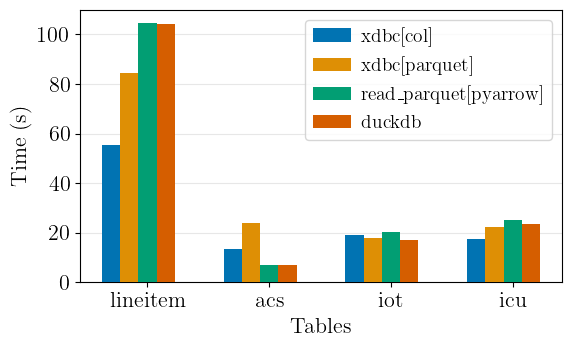

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
data = pd.read_csv("figureYParquet.csv")
data['table'] = data['table'].replace({
    'lineitem_sf10': 'lineitem',
    'ss13husallm': 'acs',
    'iotm': 'iot',
    'inputeventsm': 'icu'
})

# Define the environments
environments = data['env'].unique()

# Define the desired order for approaches
approaches = ['xdbc[col]', 'xdbc[parquet]','read_parquet[pyarrow]', 'duckdb']

# Define the desired order for tables
tables = ['lineitem', 'acs', 'iot', 'icu']

# Prepare data for plotting
grouped_data = data.groupby(['env', 'system', 'table'])['time'].mean().reset_index()

# Reindex the data to ensure the tables and approaches are in the desired order
grouped_data['table'] = pd.Categorical(grouped_data['table'], categories=tables, ordered=True)
grouped_data['system'] = pd.Categorical(grouped_data['system'], categories=approaches, ordered=True)
grouped_data = grouped_data.sort_values(['table', 'system'])

# Set up plot style
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Generate plots for each environment

env_data = grouped_data[grouped_data['env'] == env]

# Pivot the data to get tables as x-axis and approaches as bars
pivot_data = env_data.pivot(index='table', columns='system', values='time')

# Set the bar width and positions
bar_width = 0.15
x_indexes = np.arange(len(pivot_data.index))
colors = sns.color_palette("colorblind", len(approaches))

# Create the plot
plt.figure(figsize=(6, 3.75))

for i, (approach, color) in enumerate(zip(approaches, colors)):
    if approach in pivot_data.columns:
        plt.bar(x_indexes + (i - len(approaches)/2) * bar_width, pivot_data[approach],
                width=bar_width, label=approach, color=color, zorder=3)

# Labels and title
plt.xlabel('Tables')
plt.ylabel('Time (s)')
plt.xticks(ticks=x_indexes, labels=pivot_data.index)
plt.legend(loc='best', handletextpad=0.5, borderaxespad=0.5, borderpad=0.4)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, zorder=0)

# Save the plot
output_file = f'xdbc_parquet_pandas.pdf'
plt.tight_layout()
plt.savefig(output_file, bbox_inches='tight')


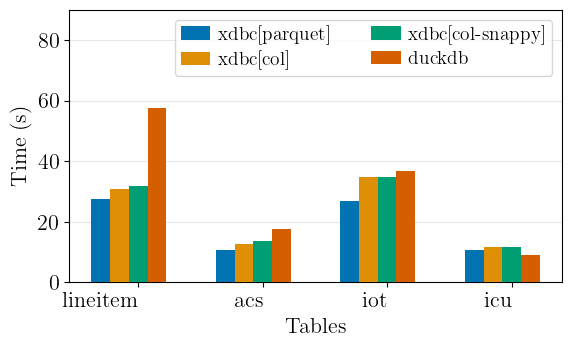

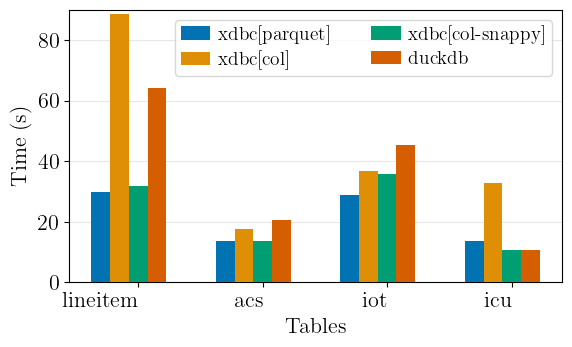

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Generate plots for each environment
for network in [0,125]:

    # Load CSV data
    data = pd.read_csv("figureZParquetCSV.csv")
    data = data[data['system']!='xdbc[parquet-snappy]']
    
    data = data[data['network']==network]
    
    data['table'] = data['table'].replace({
        'lineitem_sf10': 'lineitem',
        'ss13husallm': 'acs',
        'iotm': 'iot',
        'inputeventsm': 'icu'
    })
    
    # Define the environments
    environments = data['env'].unique()
    
    # Define the approaches
    approaches = data['system'].unique()
    
    # Prepare data for plotting
    grouped_data = data.groupby(['env', 'system', 'table'])['time'].mean().reset_index()



    approaches = ['xdbc[parquet]', 'xdbc[col]', 'xdbc[col-snappy]', 'duckdb']
    tables = ['lineitem', 'acs', 'iot', 'icu']  # Desired order for tables
    grouped_data['table'] = pd.Categorical(grouped_data['table'], categories=tables, ordered=True)
    grouped_data['system'] = pd.Categorical(grouped_data['system'], categories=approaches, ordered=True)
    grouped_data = grouped_data.sort_values('table')

    # Set up plot style
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Computer Modern Roman']
    plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})
    
    
    #env_data = grouped_data[grouped_data['env'] == env]

    # Pivot the data to get tables as x-axis and approaches as bars
    pivot_data = grouped_data.pivot(index='table', columns='system', values='time')

    

    # Set the bar width and positions
    bar_width = 0.15
    x_indexes = np.arange(len(pivot_data.index))
    colors = sns.color_palette("colorblind", len(approaches))

    # Create the plot
    plt.figure(figsize=(6, 3.75))

    for i, (approach, color) in enumerate(zip(approaches, colors)):
        if approach in pivot_data.columns:
            plt.bar(x_indexes + (i - len(approaches)/2) * bar_width, pivot_data[approach],
                    width=bar_width, label=approach, color=color, zorder=3)

    # Labels and title
    plt.xlabel('Tables')
    plt.ylabel('Time (s)')
    plt.ylim(0,90)
    
    plt.xticks(ticks=x_indexes, labels=pivot_data.index, ha='right')
    #plt.title(f'Environment: {env}')
    plt.legend(loc='best', ncol=2, labelspacing=0.3, borderpad=0.3, handletextpad=0.4, handlelength=1.5)

    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, zorder=0)

    # Save the plot
    #output_file = f'{env}_times_plot.pdf'
    plt.tight_layout()
    plt.savefig(f"xdbc_parquet_csv_formats_net{network}.pdf", bbox_inches='tight')
    plt.show()


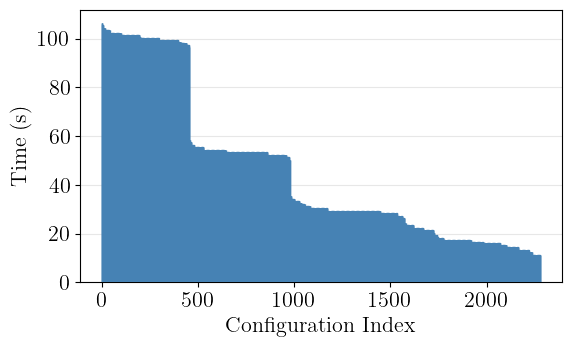

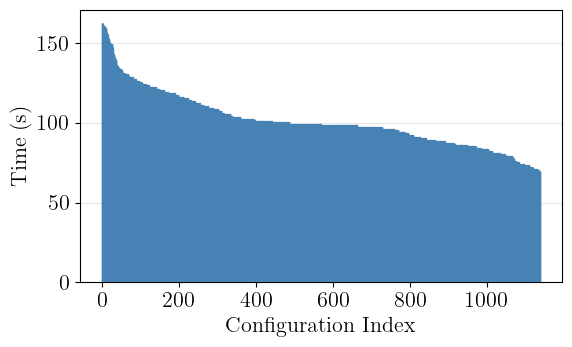

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for file in ['figure7.csv','figure7b.csv']:
    # Read the CSV file
    data = pd.read_csv(file)  # Replace with your actual CSV file name
    
    #data = data[(data['comp_par']==1) & (data['decomp_par']==1)]
    data = data[['timestamp', 'time']]
    data = data[data['time']>0]
    # Sort the data by the "time" column
    data_sorted = data.sort_values(by="time", ascending=False).reset_index()
    
    # Extract the "time" column and create indices for the x-axis
    sorted_times = data_sorted["time"].values
    sorted_indices = np.arange(len(sorted_times))  # Indices for x-axis
    
    # Set up plot style
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Computer Modern Roman']
    plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})
    
    # Create plot
    plt.figure(figsize=(6, 3.75))
    plt.bar(sorted_indices, sorted_times, width=0.6, color='steelblue', edgecolor='steelblue', zorder=3)
    
    # Add labels and title
    plt.xlabel('Configuration Index')
    plt.ylabel('Time (s)')
    #plt.xticks(ticks=sorted_indices, labels=sorted_indices, rotation=45)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, zorder=0)
    
    # Save and display the plot
    plt.tight_layout()
    plt.savefig(f'env{file}.pdf', bbox_inches='tight')
    plt.show()


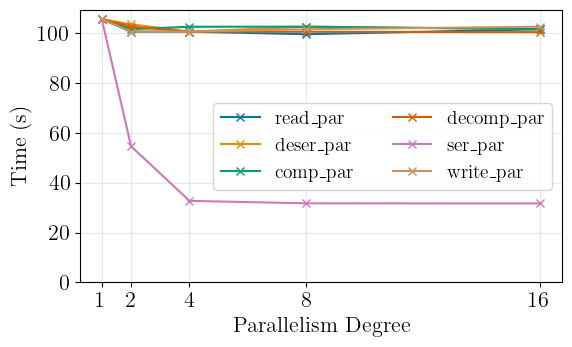

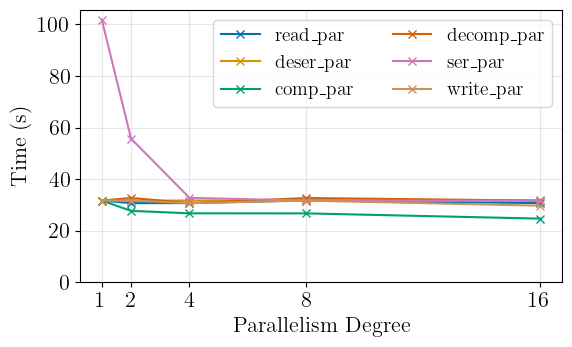

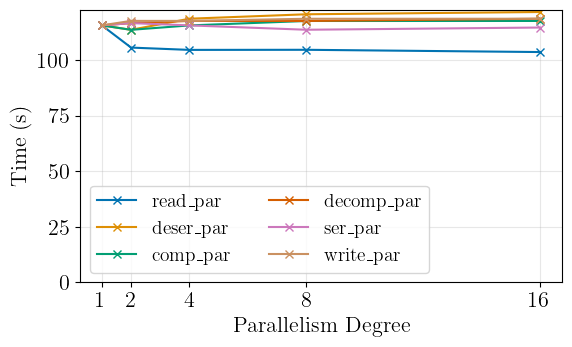

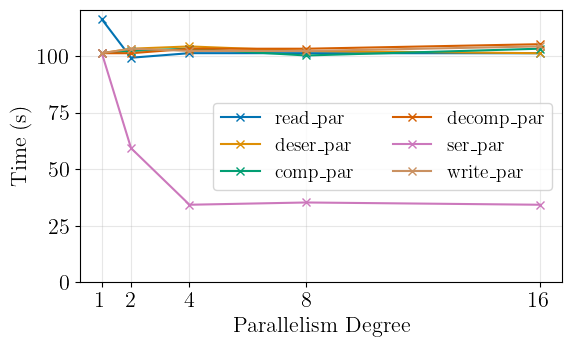

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

filenames = ['figureACSVCSV','figureACSVCSVOpt','figureBCSVPG','figureBCSVPGOpt']

output_mapping = {
    'figureACSVCSV': 'par_scale_csv_csv_write_1.pdf',
    'figureACSVCSVOpt': 'par_scale_csv_csv_ser_8.pdf',
    'figureBCSVPG': 'par_scale_postgres_csv_write_1.pdf',
    'figureBCSVPGOpt': 'par_scale_postgres_csv_read_8.pdf',
}

for filename in filenames:
    # Load CSV data
    csv_file_path = f'{filename}.csv'  # Replace with your actual file path
    df = pd.read_csv(csv_file_path)

    cols_to_consider = [
    'env', 'read_par', 'deser_par', 'comp_par',
    'send_par', 'rcv_par', 'decomp_par', 'ser_par',
    'write_par', 'table'
    ]
    
    # Remove duplicates based on these columns
    df = df.drop_duplicates(subset=cols_to_consider)
    
    # List of parallelism parameters
    parallelism_keys = [
        'read_par', 'deser_par', 'comp_par',
        'decomp_par', 'ser_par', 'write_par'
    ]
    
    # Define the fixed configuration (default values for all parameters)
    ser_par = 1
    read_par = 1
    if "figureACSVCSVOpt" in filename:
        ser_par = 8
    if "figureBCSVPGOpt" in filename:
        read_par = 8
    
    fixed_config = {
        'read_par': read_par,
        'deser_par': 1,
        'comp_par': 1,
        'decomp_par': 1,
        'ser_par': ser_par,
        'write_par': 1  # Example: This is the default write_par value
    }
    df = df.groupby(['env','table']+list(fixed_config.keys()) + ['time']).mean().reset_index()
    
    
    # Set up plot style
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Computer Modern Roman']
    plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})
    
    # Set up the plot
    plt.figure(figsize=(6, 3.75))
    
    # Range of values to scale (1 to 16, doubling)
    scale_values = [1, 2, 4, 8, 16]
    
    # Plot each parameter
    for param in parallelism_keys:
        # Filter the dataset to match the fixed configuration
        filtered_df = df.copy()
    
        # Apply the fixed configuration for all parameters except the one being scaled
        for key, value in fixed_config.items():
            if key != param:  # Keep the current parameter free to scale
                filtered_df = filtered_df[filtered_df[key] == value]
    
        # Extract the data for the current parameter
        filtered_df = filtered_df[filtered_df[param].isin(scale_values)].sort_values(by=param)
        
        # Extract x (scaled parameter values) and y (time)
        x = filtered_df[param]
        y = filtered_df['time']
        
        # Plot the results
        plt.plot(x, y, marker='x', label=f"{param}")
    
    # Customize the plot
    plt.ylim(0)
    plt.xlabel('Parallelism Degree')
    plt.ylabel('Time (s)')
    plt.xticks(scale_values, labels=[str(val) for val in scale_values])  # Ensure xticks match the scaled values
    plt.legend(loc='best', ncol=2)
    
    # Add grid and improve layout
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_mapping[filename]}', bbox_inches='tight')
    
    # Show the plot
    plt.show()


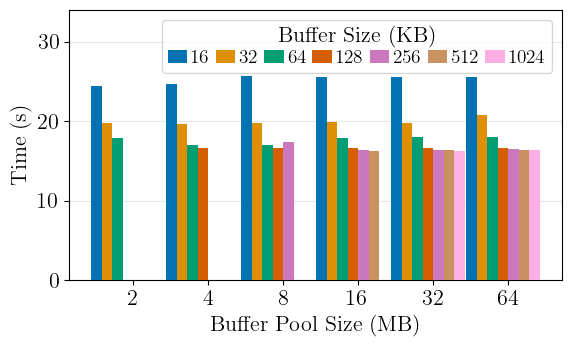

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "figureMemoryManagement.csv"
data = pd.read_csv(file_path)

data = data[data['table']=='lineitem_sf10']
# Prepare plot data
data['bufferpool_size'] = data['bufferpool_size'].astype(int)
data['buffer_size'] = data['buffer_size'].astype(int)

# Sort buffer pool and buffer sizes for consistency
data = data.sort_values(['bufferpool_size', 'buffer_size'])

# Set up plot style
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Unique buffer pool sizes and buffer sizes
bufferpool_sizes = sorted(data['bufferpool_size'].unique())
buffer_sizes = sorted(data['buffer_size'].unique())
colors = sns.color_palette("colorblind", len(buffer_sizes))

# Plot
plt.figure(figsize=(6, 3.75))
bar_width = 0.14
x_indexes = np.arange(len(bufferpool_sizes))

for i, buffer_size in enumerate(buffer_sizes):
    subset = data[data['buffer_size'] == buffer_size]
    means = [
        subset[subset['bufferpool_size'] == pool_size]['time'].mean() if pool_size in subset['bufferpool_size'].values else 0
        for pool_size in bufferpool_sizes
    ]
    positions = x_indexes + (i - len(buffer_sizes) / 2) * bar_width
    plt.bar(positions, means, width=bar_width, label=f"{buffer_size}", color=colors[i], zorder=3)

# Formatting
plt.xlabel("Buffer Pool Size (MB)")
plt.ylabel("Time (s)")
plt.ylim(0,34)
plt.xticks(ticks=x_indexes, labels=[f"{int(bp/1024)}" for bp in bufferpool_sizes], ha="center")
plt.legend(title="Buffer Size (KB)",loc='best', ncol=7, labelspacing=0.1, borderpad=0.3, handletextpad=0.2, handlelength=1, columnspacing=.3)
plt.grid(axis='y', alpha=0.3, zorder=0)

# Save and show the plot
plt.tight_layout()
plt.savefig("bufferpool_vs_buffersize.pdf", bbox_inches='tight')
plt.show()


Mean Absolute Percentage Error (MAPE): 21.52%
Root Mean Squared Error (RMSE): 147.72

Top 10 entries with the largest differences:
      estimated        real  difference  percentage_error
269      995.36  180.410299  814.949701        451.720165
2318     995.36  180.477594  814.882406        451.514444
619      995.36  180.492126  814.867874        451.470041
2409     995.36  183.764998  811.595002        441.648306
225      995.36  183.844668  811.515332        441.413580
402      995.36  187.346908  808.013092        431.292461
2489     995.36  282.321101  713.038899        252.563091
2504     995.36  290.905790  704.454210        242.158882
2662     995.36  290.938037  704.421963        242.120959
3240     995.36  291.106662  704.253338        241.922783


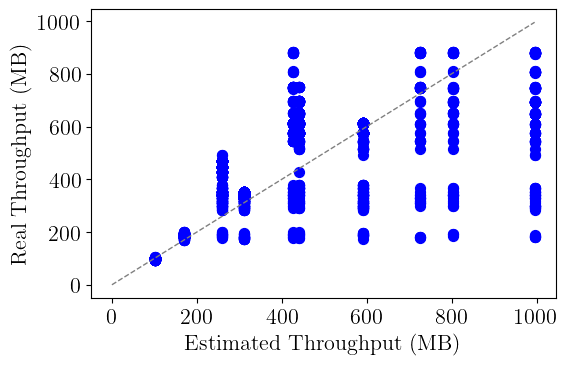

Mean Absolute Percentage Error (MAPE): 169.63%
Root Mean Squared Error (RMSE): 215.84

Top 10 entries with the largest differences:
      estimated       real  difference  percentage_error
373     592.065  61.536304  530.528696        862.139361
994     592.065  62.319609  529.745391        850.046078
1045    592.065  62.704237  529.360763        844.218495
401     592.065  63.083569  528.981431        838.540751
1572    592.065  63.093944  528.971056        838.386412
1462    592.065  63.484754  528.580246        832.609740
1357    592.065  65.134545  526.930455        808.987691
1056    592.065  65.602804  526.462196        802.499528
583     592.065  66.458762  525.606238        790.875759
113     592.065  66.933263  525.131737        784.560190


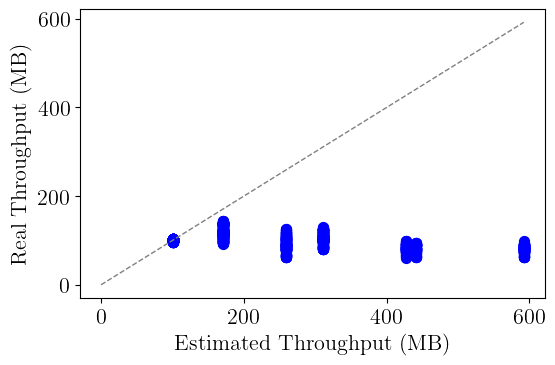

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for f in ['','b']:
    
    df = pd.read_csv(f'thr_est{f}.csv') 
    df['difference'] = abs(df['estimated'] - df['real'])
    
    
    df['difference'] = abs(df['estimated'] - df['real'])
    df['percentage_error'] = abs(df['difference'] / df['real']) * 100
    
    mape = df['percentage_error'].mean()
    rmse = np.sqrt(((df['real'] - df['estimated']) ** 2).mean())
    
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    
    top_differences = df.nlargest(10, 'difference')
    print("\nTop 10 entries with the largest differences:")
    print(top_differences[['estimated', 'real', 'difference', 'percentage_error']])
    

    plt.figure(figsize=(6, 3.75))
    
    plt.scatter(df['estimated'], df['real'], color='blue', s=50)
    
    max_val = max(df['estimated'].max(), df['real'].max())
    plt.plot([0, max_val], [0, max_val], '--', color='gray', linewidth=1)
    
    plt.xlabel('Estimated Throughput (MB)')
    plt.ylabel('Real Throughput (MB)')
    
    #plt.savefig('correlation_plot_minimal.pdf', bbox_inches='tight')
    plt.show()
